# TORONTO #

In this notebook I will investigate the geographical structure of Toronto bearing on the postal codes.


## Components of a Canadian postal code ##
# K1A 0B1 #

### K - Postal District
### K1A - Forward Sortation Area (FSA)
### 0B1 - Local Delivery Unit

A forward sortation area (FSA) is a geographical region in which all postal codes start with the same three characters.[27] The first letter of an FSA code denotes a particular "postal district", which, outside Quebec and Ontario, corresponds to an entire province or territory.

In [1]:

!pip install beautifulsoup4
!pip install lxml
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

#!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 


from IPython.display import display_html
import pandas as pd
import numpy as np
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library
from bs4 import BeautifulSoup
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors

print('Folium installed')
print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Folium installed
Libraries imported.


We concentrate on the FSA part of the postal code

In [2]:
# Readin postal codes from wikipedia page
postal_codes = pd.read_html('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M')[0]
postal_codes

,0,1,2,3,4,5,6,7,8
0,M1ANot assigned,M2ANot assigned,M3ANorth York(Parkwoods),M4ANorth York(Victoria Village),M5ADowntown Toronto(Regent Park / Harbourfront),M6ANorth York(Lawrence Manor / Lawrence Heights),M7AQueen's Park(Ontario Provincial Government),M8ANot assigned,M9AEtobicoke(Islington Avenue)
1,M1BScarborough(Malvern / Rouge),M2BNot assigned,M3BNorth York(Don Mills)North,M4BEast York(Parkview Hill / Woodbine Gardens),"M5BDowntown Toronto(Garden District, Ryerson)",M6BNorth York(Glencairn),M7BNot assigned,M8BNot assigned,M9BEtobicoke(West Deane Park / Princess Garden...
2,M1CScarborough(Rouge Hill / Port Union / Highl...,M2CNot assigned,M3CNorth York(Don Mills)South(Flemingdon Park),M4CEast York(Woodbine Heights),M5CDowntown Toronto(St. James Town),M6CYork(Humewood-Cedarvale),M7CNot assigned,M8CNot assigned,M9CEtobicoke(Eringate / Bloordale Gardens / Ol...
3,M1EScarborough(Guildwood / Morningside / West ...,M2ENot assigned,M3ENot assigned,M4EEast Toronto(The Beaches),M5EDowntown Toronto(Berczy Park),M6EYork(Caledonia-Fairbanks),M7ENot assigned,M8ENot assigned,M9ENot assigned
4,M1GScarborough(Woburn),M2GNot assigned,M3GNot assigned,M4GEast York(Leaside),M5GDowntown Toronto(Central Bay Street),M6GDowntown Toronto(Christie),M7GNot assigned,M8GNot assigned,M9GNot assigned
5,M1HScarborough(Cedarbrae),M2HNorth York(Hillcrest Village),M3HNorth York(Bathurst Manor / Wilson Heights ...,M4HEast York(Thorncliffe Park),M5HDowntown Toronto(Richmond / Adelaide / King),M6HWest Toronto(Dufferin / Dovercourt Village),M7HNot assigned,M8HNot assigned,M9HNot assigned
6,M1JScarborough(Scarborough Village),M2JNorth York(Fairview / Henry Farm / Oriole),M3JNorth York(Northwood Park / York University),M4JEast YorkEast Toronto(The Danforth East),M5JDowntown Toronto(Harbourfront East / Union ...,M6JWest Toronto(Little Portugal / Trinity),M7JNot assigned,M8JNot assigned,M9JNot assigned
7,M1KScarborough(Kennedy Park / Ionview / East B...,M2KNorth York(Bayview Village),M3KNorth York(Downsview)East (CFB Toronto),M4KEast Toronto(The Danforth West / Riverdale),M5KDowntown Toronto(Toronto Dominion Centre / ...,M6KWest Toronto(Brockton / Parkdale Village / ...,M7KNot assigned,M8KNot assigned,M9KNot assigned
8,M1LScarborough(Golden Mile / Clairlea / Oakridge),M2LNorth York(York Mills / Silver Hills),M3LNorth York(Downsview)West,M4LEast Toronto(India Bazaar / The Beaches West),M5LDowntown Toronto(Commerce Court / Victoria ...,M6LNorth York(North Park / Maple Leaf Park / U...,M7LNot assigned,M8LNot assigned,M9LNorth York(Humber Summit)
9,M1MScarborough(Cliffside / Cliffcrest / Scarbo...,M2MNorth York(Willowdale / Newtonbrook),M3MNorth York(Downsview)Central,M4MEast Toronto(Studio District),M5MNorth York(Bedford Park / Lawrence Manor East),M6MYork(Del Ray / Mount Dennis / Keelsdale and...,M7MNot assigned,M8MNot assigned,M9MNorth York(Humberlea / Emery)


The layout presented above, imported from Wikipedia has not the required layout.

The layout of the list of postal codes of Toronto boroughs must be changed to the following layout:




### index   -    postcode  -   Borough  -  Neighbourhood  ###




This will be done outside of the notebook and imported as csv-file

In [3]:
postal_codes=pd.read_csv('//Users/BoTi/Desktop/TORONTO.csv', delimiter=';')

In [4]:
postal_codes.head()

,Postcode,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront


In [5]:
# Cleaning the dataframe, removing rows with 'Not assigned'
postal_codes = postal_codes[~postal_codes.Borough.str.contains("Not assigned") == True]

In [6]:
# Reset index for the "new" dataframe
postal_codes = postal_codes.reset_index(drop=True)
postal_codes.head(20)

,Postcode,Borough,Neighbourhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,Harbourfront
3,M5A,Downtown Toronto,Regent Park
4,M6A,North York,Lawrence Heights
5,M6A,North York,Lawrence Manor
6,M7A,Queen's Park,Not assigned
7,M9A,Etobicoke,Islington Avenue
8,M1B,Scarborough,Rouge
9,M1B,Scarborough,Malvern


In [7]:
# Checking the size of the dataframe
postal_codes.shape

(211, 3)

In [131]:
# Combining the neighbourhoods with the same postal code
toronto = postal_codes.groupby(['Postcode','Borough'], sort=False).agg(', '.join)
toronto.reset_index(inplace=True)

# Replacing the name of the neighbourhoods which are 'Not assigned' with names of Borough
toronto['Neighbourhood'] = np.where(toronto['Neighbourhood'] == 'Not assigned',toronto['Borough'], toronto['Neighbourhood'])

toronto

,Postcode,Borough,Neighbourhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Harbourfront, Regent Park"
3,M6A,North York,"Lawrence Heights, Lawrence Manor"
4,M7A,Queen's Park,Queen's Park
...,...,...,...
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North"
99,M4Y,Downtown Toronto,Church and Wellesley
100,M7Y,East Toronto,Business Reply Mail Processing Centre 969 Eastern
101,M8Y,Etobicoke,"Humber Bay, King's Mill Park, Kingsway Park So..."


There is a source information about the geographical coordinates of particular boroughs (postal codes) of Toronto at https://cocl.us/Geospatioal_data.

Importing the csv file conatining the latitudes and longitudes for various neighbourhoods in Canada

In [132]:
lt_ln = pd.read_csv('https://cocl.us/Geospatial_data')
lt_ln.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


Preparing a table containing  postal codes and geographical coordinates

In [133]:
lt_ln.rename(columns={'Postal Code':'Postcode'},inplace=True)
toronto2 = pd.merge(toronto,lt_ln,on='Postcode')
toronto2.head(20)

,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Harbourfront, Regent Park",43.654260,-79.360636
3,M6A,North York,"Lawrence Heights, Lawrence Manor",43.718518,-79.464763
4,M7A,Queen's Park,Queen's Park,43.662301,-79.389494
5,M9A,Etobicoke,Islington Avenue,43.667856,-79.532242
6,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353
7,M3B,North York,Don Mills North,43.745906,-79.352188
8,M4B,East York,"Woodbine Gardens, Parkview Hill",43.706397,-79.309937
9,M5B,Downtown Toronto,"Ryerson, Garden District",43.657162,-79.378937


## Creating a map of Toronto showing the location of particular postal codes ##

In [134]:
map_toronto = folium.Map(location=[43.651070,-79.347015],zoom_start=10)

for lat,lng,borough,neighbourhood in zip(toronto2['Latitude'],toronto2['Longitude'],toronto2['Borough'],toronto2['Neighbourhood']):
    label = '{}, {}'.format(neighbourhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
    [lat,lng],
    radius=5,
    popup=label,
    color='blue',
    fill=True,
    fill_color='#3186cc',
    fill_opacity=0.7,
    parse_html=False).add_to(map_toronto)
map_toronto

## Screenshot of the map generated by the code above ##

### Map 1 ###

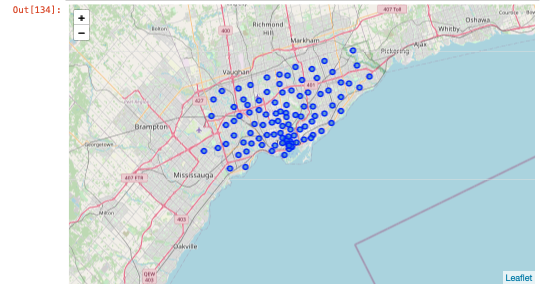

In [5]:
from IPython.display import Image
from IPython.core.display import HTML 
PATH = "/Users/BoTi/Desktop/"
Image(filename = PATH + "Map 1.png", width=1000, height=1000)

## Clustering using KMens for the neighbouthoods ##

This is an initisl clustering aimed at choosing the right area for further in-detail analysis

In [135]:
k=5
toronto_clustering = toronto2.drop(['Postcode','Borough','Neighbourhood'],1)
kmeans = KMeans(n_clusters = k,random_state=0).fit(toronto_clustering)
kmeans.labels_
toronto2.insert(0, 'Cluster Labels', kmeans.labels_)

In [136]:
toronto2

,Cluster Labels,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,4,M3A,North York,Parkwoods,43.753259,-79.329656
1,4,M4A,North York,Victoria Village,43.725882,-79.315572
2,2,M5A,Downtown Toronto,"Harbourfront, Regent Park",43.654260,-79.360636
3,0,M6A,North York,"Lawrence Heights, Lawrence Manor",43.718518,-79.464763
4,2,M7A,Queen's Park,Queen's Park,43.662301,-79.389494
...,...,...,...,...,...,...
98,1,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North",43.653654,-79.506944
99,2,M4Y,Downtown Toronto,Church and Wellesley,43.665860,-79.383160
100,4,M7Y,East Toronto,Business Reply Mail Processing Centre 969 Eastern,43.662744,-79.321558
101,1,M8Y,Etobicoke,"Humber Bay, King's Mill Park, Kingsway Park So...",43.636258,-79.498509


General geographical coordinates of Toronto

In [137]:
address = 'Toronto, On'

geolocator = Nominatim(user_agent="toronto_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


In [138]:
# create map
map_clusters = folium.Map(location=[location.latitude,location.longitude],zoom_start=10)

# set color scheme for the clusters
x = np.arange(k)
ys = [i + x + (i*x)**2 for i in range(k)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, neighbourhood, cluster in zip(toronto2['Latitude'], toronto2['Longitude'], toronto2['Neighbourhood'], toronto2['Cluster Labels']):
    label = folium.Popup(' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters



## Screenshot of the map generated by the code above ##

### Map 2 ###

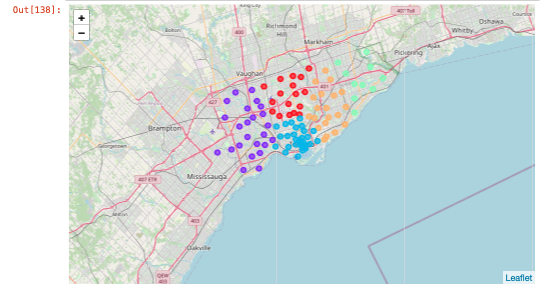

In [7]:
PATH = "/Users/BoTi/Desktop/"
Image(filename = PATH + "Map 2.png", width=1000, height=1000)

We are choosing the central area of Toronto.

Only boroughs and neighbourhoods from the the cluster __nbr 2__ will be chosen

In [139]:
toronto3= toronto2.loc[toronto2['Cluster Labels']==2]

In [140]:
toronto3.head(20)

,Cluster Labels,Postcode,Borough,Neighbourhood,Latitude,Longitude
2,2,M5A,Downtown Toronto,"Harbourfront, Regent Park",43.654260,-79.360636
4,2,M7A,Queen's Park,Queen's Park,43.662301,-79.389494
9,2,M5B,Downtown Toronto,"Ryerson, Garden District",43.657162,-79.378937
15,2,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
16,2,M6C,York,Humewood-Cedarvale,43.693781,-79.428191
20,2,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306
21,2,M6E,York,Caledonia-Fairbanks,43.689026,-79.453512
24,2,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383
25,2,M6G,Downtown Toronto,Christie,43.669542,-79.422564
30,2,M5H,Downtown Toronto,"Adelaide, King, Richmond",43.650571,-79.384568


In [141]:
map_toronto3 = folium.Map(location=[location.latitude,location.longitude],zoom_start=10)

for lat,lng,borough,neighbourhood in zip(toronto3['Latitude'],toronto3['Longitude'],toronto3['Borough'],toronto3['Neighbourhood']):
    label = '{}, {}'.format(neighbourhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
    [lat,lng],
    radius=5,
    popup=label,
    color='blue',
    fill=True,
    fill_color='#3186cc',
    fill_opacity=0.7,
    parse_html=False).add_to(map_toronto3)
map_toronto3


## Screenshot of the map generated by the code above ##

### Map 3 ###

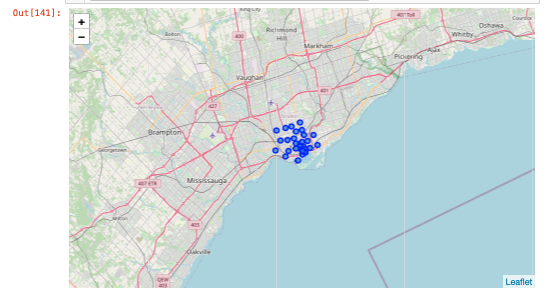

In [9]:
PATH = "/Users/BoTi/Desktop/"
Image(filename = PATH + "Map 3.png", width=1000, height=1000)

### Searching data bout the particular neighbourhood ###

First drfinition of the oursquare credentials

In [37]:
CLIENT_ID = 'RJE5YYJQ1QAALXDUN4XG33JJCNFZTJQ3C2L3P1JUBDIR23GZ' # your Foursquare ID
CLIENT_SECRET = '2UCZ2D0FOMBDHTT0WKCGUGUJNBOQGIG2SVFC3RLFPVF3JYH5' # your Foursquare Secret
ACCESS_TOKEN = 'AMNSQFOKEDN0CQDTKWFXFAGYEQHUSFLNY13ULSMH3GIPZZYU' # your FourSquare Access Token
VERSION = '20180604'
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: RJE5YYJQ1QAALXDUN4XG33JJCNFZTJQ3C2L3P1JUBDIR23GZ
CLIENT_SECRET:2UCZ2D0FOMBDHTT0WKCGUGUJNBOQGIG2SVFC3RLFPVF3JYH5


In [46]:
toronto3.reset_index(inplace=True)
toronto3.head()

,level_0,index,Cluster Labels,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,0,2,2,M5A,Downtown Toronto,"Harbourfront, Regent Park",43.654260,-79.360636
1,1,4,2,M7A,Queen's Park,Queen's Park,43.662301,-79.389494
2,2,9,2,M5B,Downtown Toronto,"Ryerson, Garden District",43.657162,-79.378937
3,3,15,2,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
4,4,16,2,M6C,York,Humewood-Cedarvale,43.693781,-79.428191


In [47]:
n1=toronto3.loc[1,'Neighbourhood']

In [48]:
n1

"Queen's Park"

In [52]:
neighbourhood_latitude = toronto3.loc[1, 'Latitude'] # neighborhood latitude value
neighbourhood_longitude = toronto3.loc[1, 'Longitude'] # neighbourhood longitude value

neighbourhood_name = toronto3.loc[1, 'Neighbourhood'] # neighbourhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighbourhood_name, 
                                                               neighbourhood_latitude, 
                                                               neighbourhood_longitude))

Latitude and longitude values of Queen's Park are 43.6623015, -79.3894938.


Looking for 100 top venues in the area of Queen's Park (radius = 500 m)

In [55]:

LIMIT = 100 # number of venues returned by Foursquare API

radius = 500 # radius in [m]

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighbourhood_latitude, 
    neighbourhood_longitude, 
    radius, 
    LIMIT)
url 

'https://api.foursquare.com/v2/venues/explore?&client_id=RJE5YYJQ1QAALXDUN4XG33JJCNFZTJQ3C2L3P1JUBDIR23GZ&client_secret=2UCZ2D0FOMBDHTT0WKCGUGUJNBOQGIG2SVFC3RLFPVF3JYH5&v=20180604&ll=43.6623015,-79.3894938&radius=500&limit=100'

In [56]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '60ab5001e34fa3427ca249f8'},
 'response': {'headerLocation': 'Bay Street Corridor',
  'headerFullLocation': 'Bay Street Corridor, Toronto',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 31,
  'suggestedBounds': {'ne': {'lat': 43.6668015045, 'lng': -79.38328496866619},
   'sw': {'lat': 43.657801495499996, 'lng': -79.3957026313338}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4b9d206bf964a520e69136e3',
       'name': "Queen's Park",
       'location': {'address': 'University Ave.',
        'crossStreet': 'at Wellesley Ave.',
        'lat': 43.66394609897775,
        'lng': -79.39217952520835,
        'labeledLatLngs': [{'label': 'display',
          'lat': 43.66394609897775,
          'lng': -79.39217952520835}],


In [57]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [66]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

<ipython-input-66-561c05f0fdd1>:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  nearby_venues = json_normalize(venues) # flatten JSON


,name,categories,lat,lng
0,Queen's Park,Park,43.663946,-79.392180
1,Mercatto,Italian Restaurant,43.660391,-79.387664
2,NEO COFFEE BAR,Coffee Shop,43.660130,-79.385830
3,T-Swirl Crepe,Creperie,43.663452,-79.384125
4,Bar Volo,Beer Bar,43.665462,-79.385692


In [67]:
nearby_venues.head(20)

,name,categories,lat,lng
0,Queen's Park,Park,43.663946,-79.392180
1,Mercatto,Italian Restaurant,43.660391,-79.387664
2,NEO COFFEE BAR,Coffee Shop,43.660130,-79.385830
3,T-Swirl Crepe,Creperie,43.663452,-79.384125
4,Bar Volo,Beer Bar,43.665462,-79.385692
5,The Yoga Sanctuary,Yoga Studio,43.661499,-79.383636
6,Tokyo Sushi,Sushi Restaurant,43.665885,-79.386977
7,Starbucks,Coffee Shop,43.659456,-79.390411
8,Central YMCA,Distribution Center,43.663083,-79.385025
9,Burrito Bandidos,Burrito Place,43.662962,-79.383956


In [68]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

31 venues were returned by Foursquare.


In [69]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [70]:
toronto3_venues = getNearbyVenues(names=toronto3['Neighbourhood'],
                                   latitudes=toronto3['Latitude'],
                                   longitudes=toronto3['Longitude']
                                  )

Harbourfront, Regent Park
Queen's Park
Ryerson, Garden District
St. James Town
Humewood-Cedarvale
Berczy Park
Caledonia-Fairbanks
Central Bay Street
Christie
Adelaide, King, Richmond
Dovercourt Village, Dufferin
Harbourfront East, Toronto Islands, Union Station
Little Portugal, Trinity
The Danforth West, Riverdale
Design Exchange, Toronto Dominion Centre
Brockton, Exhibition Place, Parkdale Village
Commerce Court, Victoria Hotel
Studio District
Forest Hill North, Forest Hill West
The Annex, North Midtown, Yorkville
Parkdale, Roncesvalles
Davisville
Harbord, University of Toronto
Moore Park, Summerhill East
Chinatown, Grange Park, Kensington Market
Deer Park, Forest Hill SE, Rathnelly, South Hill, Summerhill West
CN Tower, Bathurst Quay, Island airport, Harbourfront West, King and Spadina, Railway Lands, South Niagara
Rosedale
Stn A PO Boxes 25 The Esplanade
Cabbagetown, St. James Town
First Canadian Place, Underground city
Church and Wellesley


In [72]:
print(toronto3_venues.shape)
toronto3_venues.head()

(1478, 7)


,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Harbourfront, Regent Park",43.65426,-79.360636,Roselle Desserts,43.653447,-79.362017,Bakery
1,"Harbourfront, Regent Park",43.65426,-79.360636,Tandem Coffee,43.653559,-79.361809,Coffee Shop
2,"Harbourfront, Regent Park",43.65426,-79.360636,Cooper Koo Family YMCA,43.653249,-79.358008,Distribution Center
3,"Harbourfront, Regent Park",43.65426,-79.360636,Impact Kitchen,43.656369,-79.356980,Restaurant
4,"Harbourfront, Regent Park",43.65426,-79.360636,Body Blitz Spa East,43.654735,-79.359874,Spa


In [73]:
toronto3_venues.groupby('Neighbourhood').count()

,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighbourhood,,,,,,
"Adelaide, King, Richmond",93,93,93,93,93,93
Berczy Park,61,61,61,61,61,61
"Brockton, Exhibition Place, Parkdale Village",23,23,23,23,23,23
"CN Tower, Bathurst Quay, Island airport, Harbourfront West, King and Spadina, Railway Lands, South Niagara",13,13,13,13,13,13
"Cabbagetown, St. James Town",46,46,46,46,46,46
Caledonia-Fairbanks,4,4,4,4,4,4
Central Bay Street,63,63,63,63,63,63
"Chinatown, Grange Park, Kensington Market",62,62,62,62,62,62
Christie,16,16,16,16,16,16


In [74]:
print('There are {} uniques categories.'.format(len(toronto3_venues['Venue Category'].unique())))

There are 228 uniques categories.


In [78]:
# one hot encoding
toronto3_onehot = pd.get_dummies(toronto3_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto3_onehot['Neighbourhood'] = toronto3_venues['Neighbourhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto3_onehot.columns[-1]] + list(toronto3_onehot.columns[:-1])
toronto3_onehot = toronto3_onehot[fixed_columns]

toronto3_onehot.head()

,Neighbourhood,Adult Boutique,Afghan Restaurant,Airport,Airport Food Court,Airport Lounge,Airport Service,American Restaurant,Antique Shop,Aquarium,...,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,"Harbourfront, Regent Park",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"Harbourfront, Regent Park",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Harbourfront, Regent Park",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"Harbourfront, Regent Park",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"Harbourfront, Regent Park",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [79]:
toronto3_onehot.shape

(1478, 229)

In [80]:
toronto3_grouped = toronto3_onehot.groupby('Neighbourhood').mean().reset_index()
toronto3_grouped

,Neighbourhood,Adult Boutique,Afghan Restaurant,Airport,Airport Food Court,Airport Lounge,Airport Service,American Restaurant,Antique Shop,Aquarium,...,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,"Adelaide, King, Richmond",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.021505,0.000000,0.00,...,0.000000,0.000000,0.00,0.010753,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Berczy Park,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,...,0.000000,0.000000,0.00,0.016393,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,"Brockton, Exhibition Place, Parkdale Village",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,...,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,"CN Tower, Bathurst Quay, Island airport, Harbo...",0.000000,0.000000,0.076923,0.076923,0.153846,0.230769,0.000000,0.000000,0.00,...,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,"Cabbagetown, St. James Town",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,...,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,Caledonia-Fairbanks,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,...,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000
6,Central Bay Street,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,...,0.000000,0.000000,0.00,0.015873,0.000000,0.000000,0.015873,0.000000,0.000000,0.015873
7,"Chinatown, Grange Park, Kensington Market",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,...,0.000000,0.000000,0.00,0.048387,0.000000,0.048387,0.016129,0.000000,0.016129,0.000000
8,Christie,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,...,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,Church and Wellesley,0.012987,0.012987,0.000000,0.000000,0.000000,0.000000,0.012987,0.000000,0.00,...,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.025974


In [81]:
toronto3_grouped.shape

(32, 229)

In [82]:
num_top_venues = 5

for hood in toronto3_grouped['Neighbourhood']:
    print("----"+hood+"----")
    temp = toronto3_grouped[toronto3_grouped['Neighbourhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Adelaide, King, Richmond----
           venue  freq
0    Coffee Shop  0.11
1           Café  0.05
2     Restaurant  0.04
3  Deli / Bodega  0.03
4            Gym  0.03


----Berczy Park----
            venue  freq
0     Coffee Shop  0.10
1    Cocktail Bar  0.07
2          Bakery  0.05
3        Pharmacy  0.03
4  Farmers Market  0.03


----Brockton, Exhibition Place, Parkdale Village----
            venue  freq
0            Café  0.13
1  Breakfast Spot  0.09
2          Bakery  0.09
3     Coffee Shop  0.09
4       Pet Store  0.04


----CN Tower, Bathurst Quay, Island airport, Harbourfront West, King and Spadina, Railway Lands, South Niagara----
                 venue  freq
0      Airport Service  0.23
1       Airport Lounge  0.15
2                Plane  0.08
3             Boutique  0.08
4  Rental Car Location  0.08


----Cabbagetown, St. James Town----
         venue  freq
0  Coffee Shop  0.07
1       Bakery  0.07
2   Restaurant  0.04
3          Pub  0.04
4  Pizza Place  0.04


----Cal

In [83]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [113]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))


neighbourhoods_venues_sorted = pd.DataFrame(columns=columns)
neighbourhoods_venues_sorted['Neighbourhood'] = toronto3_grouped['Neighbourhood']

for ind in np.arange(toronto3_grouped.shape[0]):
    neighbourhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto3_grouped.iloc[ind, :], num_top_venues)

neighbourhoods_venues_sorted.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Adelaide, King, Richmond",Coffee Shop,Café,Restaurant,Gym,Deli / Bodega,Clothing Store,Thai Restaurant,Hotel,Salad Place,Bookstore
1,Berczy Park,Coffee Shop,Cocktail Bar,Bakery,Seafood Restaurant,Pharmacy,Farmers Market,Restaurant,Cheese Shop,Beer Bar,Lounge
2,"Brockton, Exhibition Place, Parkdale Village",Café,Bakery,Coffee Shop,Breakfast Spot,Gym,Performing Arts Venue,Pet Store,Grocery Store,Nightclub,Climbing Gym
3,"CN Tower, Bathurst Quay, Island airport, Harbo...",Airport Service,Airport Lounge,Harbor / Marina,Boat or Ferry,Plane,Rental Car Location,Sculpture Garden,Boutique,Airport Food Court,Airport
4,"Cabbagetown, St. James Town",Coffee Shop,Bakery,Park,Restaurant,Italian Restaurant,Pizza Place,Chinese Restaurant,Pub,Café,Beer Store


Next setp of clustring

## Clustering the neighbourhoods ##

k-means for 5 clusters

In [150]:

kclusters = 5

toronto3_grouped_clustering = toronto3_grouped.drop('Neighbourhood', 1)


kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto3_grouped_clustering)


kmeans.labels_[0:10] 

array([0, 0, 0, 4, 0, 2, 0, 0, 0, 0], dtype=int32)

In [153]:
toronto3.drop(['Cluster Labels'],axis=1, inplace=True)
toronto3.columns

/Users/BoTi/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Index(['Postcode', 'Borough', 'Neighbourhood', 'Latitude', 'Longitude'], dtype='object')

In [155]:
neighbourhoods_venues_sorted.insert(4, 'Cluster Labels', kmeans.labels_)

toronto3_merged = toronto3


toronto3_merged = toronto3_merged.join(neighbourhoods_venues_sorted.set_index('Neighbourhood'), on='Neighbourhood')

toronto3_merged.head(20)

,Postcode,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,M5A,Downtown Toronto,"Harbourfront, Regent Park",43.654260,-79.360636,0,Coffee Shop,Park,Bakery,Café,Theater,Breakfast Spot,Pub,Distribution Center,French Restaurant,Mexican Restaurant
4,M7A,Queen's Park,Queen's Park,43.662301,-79.389494,0,Coffee Shop,Sushi Restaurant,Yoga Studio,Bar,Spa,Smoothie Shop,Sandwich Place,Burrito Place,Salad Place,Café
9,M5B,Downtown Toronto,"Ryerson, Garden District",43.657162,-79.378937,0,Coffee Shop,Clothing Store,Italian Restaurant,Middle Eastern Restaurant,Japanese Restaurant,Bubble Tea Shop,Café,Hotel,Cosmetics Shop,Movie Theater
15,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418,0,Coffee Shop,Café,Gastropub,Cocktail Bar,Creperie,Park,Cheese Shop,Department Store,Moroccan Restaurant,Clothing Store
16,M6C,York,Humewood-Cedarvale,43.693781,-79.428191,1,Hockey Arena,Trail,Field,Yoga Studio,Distribution Center,Farmers Market,Falafel Restaurant,Event Space,Ethiopian Restaurant,Escape Room
20,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306,0,Coffee Shop,Cocktail Bar,Bakery,Seafood Restaurant,Pharmacy,Farmers Market,Restaurant,Cheese Shop,Beer Bar,Lounge
21,M6E,York,Caledonia-Fairbanks,43.689026,-79.453512,2,Park,Women's Store,Pool,Discount Store,Falafel Restaurant,Event Space,Ethiopian Restaurant,Escape Room,Electronics Store,Eastern European Restaurant
24,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383,0,Coffee Shop,Café,Italian Restaurant,Sandwich Place,Salad Place,Burger Joint,Japanese Restaurant,Thai Restaurant,Bubble Tea Shop,Middle Eastern Restaurant
25,M6G,Downtown Toronto,Christie,43.669542,-79.422564,0,Grocery Store,Café,Park,Nightclub,Candy Store,Italian Restaurant,Restaurant,Athletics & Sports,Coffee Shop,Baby Store
30,M5H,Downtown Toronto,"Adelaide, King, Richmond",43.650571,-79.384568,0,Coffee Shop,Café,Restaurant,Gym,Deli / Bodega,Clothing Store,Thai Restaurant,Hotel,Salad Place,Bookstore


In [156]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto3_merged['Latitude'], toronto3_merged['Longitude'], toronto3_merged['Neighbourhood'], toronto3_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Screenshot of the map generated by the code above ##

### Map 4 ###

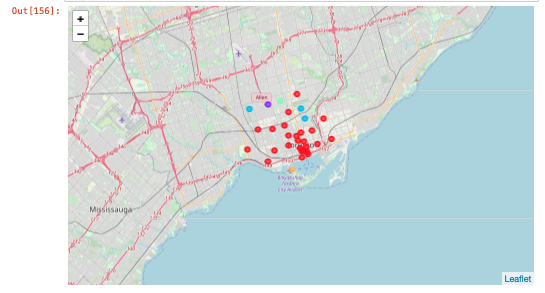

In [10]:
PATH = "/Users/BoTi/Desktop/"
Image(filename = PATH + "Map 4.png", width=1000, height=1000)

In [157]:
toronto3_merged.loc[toronto3_merged['Cluster Labels'] == 0, toronto3_merged.columns[[4] + list(range(5, toronto3_merged.shape[1]))]]

,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,-79.360636,0,Coffee Shop,Park,Bakery,Café,Theater,Breakfast Spot,Pub,Distribution Center,French Restaurant,Mexican Restaurant
4,-79.389494,0,Coffee Shop,Sushi Restaurant,Yoga Studio,Bar,Spa,Smoothie Shop,Sandwich Place,Burrito Place,Salad Place,Café
9,-79.378937,0,Coffee Shop,Clothing Store,Italian Restaurant,Middle Eastern Restaurant,Japanese Restaurant,Bubble Tea Shop,Café,Hotel,Cosmetics Shop,Movie Theater
15,-79.375418,0,Coffee Shop,Café,Gastropub,Cocktail Bar,Creperie,Park,Cheese Shop,Department Store,Moroccan Restaurant,Clothing Store
20,-79.373306,0,Coffee Shop,Cocktail Bar,Bakery,Seafood Restaurant,Pharmacy,Farmers Market,Restaurant,Cheese Shop,Beer Bar,Lounge
24,-79.387383,0,Coffee Shop,Café,Italian Restaurant,Sandwich Place,Salad Place,Burger Joint,Japanese Restaurant,Thai Restaurant,Bubble Tea Shop,Middle Eastern Restaurant
25,-79.422564,0,Grocery Store,Café,Park,Nightclub,Candy Store,Italian Restaurant,Restaurant,Athletics & Sports,Coffee Shop,Baby Store
30,-79.384568,0,Coffee Shop,Café,Restaurant,Gym,Deli / Bodega,Clothing Store,Thai Restaurant,Hotel,Salad Place,Bookstore
31,-79.442259,0,Pharmacy,Bakery,Park,Music Venue,Brewery,Café,Middle Eastern Restaurant,Supermarket,Bar,Bank
36,-79.381752,0,Coffee Shop,Aquarium,Hotel,Café,Fried Chicken Joint,Italian Restaurant,Restaurant,Brewery,Pizza Place,Scenic Lookout


In [158]:
toronto3_merged.loc[toronto3_merged['Cluster Labels'] ==1, toronto3_merged.columns[[4] + list(range(5, toronto3_merged.shape[1]))]]

,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
16,-79.428191,1,Hockey Arena,Trail,Field,Yoga Studio,Distribution Center,Farmers Market,Falafel Restaurant,Event Space,Ethiopian Restaurant,Escape Room


In [159]:
toronto3_merged.loc[toronto3_merged['Cluster Labels'] == 2, toronto3_merged.columns[[4] + list(range(5, toronto3_merged.shape[1]))]]

,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
21,-79.453512,2,Park,Women's Store,Pool,Discount Store,Falafel Restaurant,Event Space,Ethiopian Restaurant,Escape Room,Electronics Store,Eastern European Restaurant
83,-79.383160,2,Park,Restaurant,Yoga Studio,Discount Store,Falafel Restaurant,Event Space,Ethiopian Restaurant,Escape Room,Electronics Store,Eastern European Restaurant
91,-79.377529,2,Park,Playground,Trail,Yoga Studio,Diner,Event Space,Ethiopian Restaurant,Escape Room,Electronics Store,Eastern European Restaurant


In [160]:
toronto3_merged.loc[toronto3_merged['Cluster Labels'] == 3, toronto3_merged.columns[[4] + list(range(5, toronto3_merged.shape[1]))]]

,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
68,-79.411307,3,Park,Trail,Jewelry Store,Sushi Restaurant,Yoga Studio,Distribution Center,Falafel Restaurant,Event Space,Ethiopian Restaurant,Escape Room


In [161]:
toronto3_merged.loc[toronto3_merged['Cluster Labels'] == 4, toronto3_merged.columns[[4] + list(range(5, toronto3_merged.shape[1]))]]

,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
87,-79.39442,4,Airport Service,Airport Lounge,Harbor / Marina,Boat or Ferry,Plane,Rental Car Location,Sculpture Garden,Boutique,Airport Food Court,Airport
